# Testing Extrapolation Capability

# PDE loss imposed only at all frequencies
# Data loss imposed at 3 and 4 Hz
# Predictions made at 3,4,5,6 and 7 Hz
# Transfer learning is NOT imposed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import tensorflow as tf
from sciann import Functional, Variable, SciModel, PDE
from sciann.utils import *
import scipy.io 
import time
import random
import sciann as sn

from scipy.io import loadmat,savemat


2023-03-15 08:26:38.141665: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


---------------------- SCIANN 0.7.0.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.10.0 
Python Version: 3.10.9 (main, Mar  8 2023, 04:44:36) [Clang 14.0.6 ] 



In [2]:
filename = 'L327N100X4_Extrap'

data_3Hz    = loadmat('../Training_Data/train_data_3Hz.mat')
U0r_3Hz     = data_3Hz['U0_real_train'].reshape([-1,1],order='F')
U0i_3Hz     = data_3Hz['U0_imag_train'].reshape([-1,1],order='F')
U0rxx_3Hz   = data_3Hz['dxxU0_real_train'].reshape([-1,1],order='F')
U0ixx_3Hz   = data_3Hz['dxxU0_imag_train'].reshape([-1,1],order='F')
U0rzz_3Hz   = data_3Hz['dzzU0_real_train'].reshape([-1,1],order='F')
U0izz_3Hz   = data_3Hz['dzzU0_imag_train'].reshape([-1,1],order='F')


data_4Hz    = loadmat('../Training_Data/train_data_4Hz.mat')
U0r_4Hz     = data_4Hz['U0_real_train'].reshape([-1,1],order='F')
U0i_4Hz     = data_4Hz['U0_imag_train'].reshape([-1,1],order='F')
U0rxx_4Hz   = data_4Hz['dxxU0_real_train'].reshape([-1,1],order='F')
U0ixx_4Hz   = data_4Hz['dxxU0_imag_train'].reshape([-1,1],order='F')
U0rzz_4Hz   = data_4Hz['dzzU0_real_train'].reshape([-1,1],order='F')
U0izz_4Hz   = data_4Hz['dzzU0_imag_train'].reshape([-1,1],order='F')

data_5Hz    = loadmat('../Training_Data/train_data_5Hz.mat')
U0r_5Hz     = data_5Hz['U0_real_train'].reshape([-1,1],order='F')
U0i_5Hz     = data_5Hz['U0_imag_train'].reshape([-1,1],order='F')
U0rxx_5Hz   = data_5Hz['dxxU0_real_train'].reshape([-1,1],order='F')
U0ixx_5Hz   = data_5Hz['dxxU0_imag_train'].reshape([-1,1],order='F')
U0rzz_5Hz   = data_5Hz['dzzU0_real_train'].reshape([-1,1],order='F')
U0izz_5Hz   = data_5Hz['dzzU0_imag_train'].reshape([-1,1],order='F')

data_6Hz    = loadmat('../Training_Data/train_data_6Hz.mat')
U0r_6Hz     = data_6Hz['U0_real_train'].reshape([-1,1],order='F')
U0i_6Hz     = data_6Hz['U0_imag_train'].reshape([-1,1],order='F')
U0rxx_6Hz   = data_6Hz['dxxU0_real_train'].reshape([-1,1],order='F')
U0ixx_6Hz   = data_6Hz['dxxU0_imag_train'].reshape([-1,1],order='F')
U0rzz_6Hz   = data_6Hz['dzzU0_real_train'].reshape([-1,1],order='F')
U0izz_6Hz   = data_6Hz['dzzU0_imag_train'].reshape([-1,1],order='F')

data_7Hz    = loadmat('../Training_Data/train_data_7Hz.mat')
U0r_7Hz     = data_7Hz['U0_real_train'].reshape([-1,1],order='F')
U0i_7Hz     = data_7Hz['U0_imag_train'].reshape([-1,1],order='F')
U0rxx_7Hz   = data_7Hz['dxxU0_real_train'].reshape([-1,1],order='F')
U0ixx_7Hz   = data_7Hz['dxxU0_imag_train'].reshape([-1,1],order='F')
U0rzz_7Hz   = data_7Hz['dzzU0_real_train'].reshape([-1,1],order='F')
U0izz_7Hz   = data_7Hz['dzzU0_imag_train'].reshape([-1,1],order='F')

data_8Hz    = loadmat('../Training_Data/train_data_8Hz.mat')
U0r_8Hz     = data_8Hz['U0_real_train'].reshape([-1,1],order='F')
U0i_8Hz     = data_8Hz['U0_imag_train'].reshape([-1,1],order='F')
U0rxx_8Hz   = data_8Hz['dxxU0_real_train'].reshape([-1,1],order='F')
U0ixx_8Hz   = data_8Hz['dxxU0_imag_train'].reshape([-1,1],order='F')
U0rzz_8Hz   = data_8Hz['dzzU0_real_train'].reshape([-1,1],order='F')
U0izz_8Hz   = data_8Hz['dzzU0_imag_train'].reshape([-1,1],order='F')


x_train     = data_3Hz['x_train'].reshape([-1,1],order='F')
z_train     = data_3Hz['z_train'].reshape([-1,1],order='F')
m_vec       = data_3Hz['m_train'].reshape([-1,1],order='F')
m0_vec      = data_3Hz['m0_train'].reshape([-1,1],order='F')
eta_vec     = data_3Hz['eta_train'].reshape([-1,1],order='F')
delta_vec   = data_3Hz['delta_train'].reshape([-1,1],order='F')


U0r_train     = np.vstack((U0r_3Hz,U0r_4Hz,U0r_5Hz,U0r_6Hz,U0r_7Hz))
U0i_train     = np.vstack((U0i_3Hz,U0i_4Hz,U0i_5Hz,U0i_6Hz,U0i_7Hz))
U0rxx_train   = np.vstack((U0rxx_3Hz,U0rxx_4Hz,U0rxx_5Hz,U0rxx_6Hz,U0rxx_7Hz))
U0ixx_train   = np.vstack((U0ixx_3Hz,U0ixx_4Hz,U0ixx_5Hz,U0ixx_6Hz,U0ixx_7Hz))
U0rzz_train   = np.vstack((U0rzz_3Hz,U0rzz_4Hz,U0rzz_5Hz,U0rzz_6Hz,U0rzz_7Hz))
U0izz_train   = np.vstack((U0izz_3Hz,U0izz_4Hz,U0izz_5Hz,U0izz_6Hz,U0izz_7Hz))
dUr_3Hz_train = data_3Hz['dU_real_train']
dUi_3Hz_train = data_3Hz['dU_imag_train']
dUr_4Hz_train = data_4Hz['dU_real_train']
dUi_4Hz_train = data_4Hz['dU_real_train']
dUr_5Hz_train = data_5Hz['dU_real_train']
dUi_5Hz_train = data_5Hz['dU_real_train']


nz            = int(np.sqrt(len(x_train))); nx = nz; total_points = nz*nx
N             = total_points

In [3]:
temp1       = np.array([])
temp2       = np.array([])
temp3       = np.array([])
M_train     = np.array([])
M0_train    = np.array([])
ETA_train   = np.array([])
DELTA_train = np.array([])
freq_list   = np.r_[3,4,5,6,7]; data_freq = 2;
no_of_frequencies = len(freq_list)
for ind in range(no_of_frequencies):
    temp1   = np.append(temp1,z_train).reshape([-1,1],order='F')
    temp2   = np.append(temp2,x_train).reshape([-1,1],order='F')
    temp3   = np.append(temp3,(freq_list[ind]/np.max(freq_list))*np.ones([N,1])).reshape([-1,1],order='F')
    M_train       = np.append(M_train,m_vec).reshape([-1,1],order='F')
    M0_train      = np.append(M0_train,m0_vec).reshape([-1,1],order='F')
    ETA_train     = np.append(ETA_train,eta_vec).reshape([-1,1],order='F')
    DELTA_train   = np.append(DELTA_train,delta_vec).reshape([-1,1],order='F')

X_train     = [temp1, temp2, temp3]

In [4]:
# Indices to enforce PDE Constraint
selected_pts    = np.random.choice(np.arange(N),N,replace=False)
selected_pts    = np.unique(selected_pts)

# Indices to enforce Data Constraint
imp_ids         = np.int_([])
for i in range(data_freq):
    imp_ids     = np.append(imp_ids,selected_pts + i*N)
    
pde_ids         = np.int_([])
for i in range(no_of_frequencies):
    pde_ids     = np.append(pde_ids,selected_pts + i*N)

In [5]:
dUr_train       = np.vstack((dUr_3Hz_train,dUr_4Hz_train))
dUi_train       = np.vstack((dUi_3Hz_train,dUi_4Hz_train))
dUr_imp         = dUr_train[imp_ids].reshape((-1,1),order='F')
dUi_imp         = dUi_train[imp_ids].reshape((-1,1),order='F')

U0rxx_imp       = U0rxx_train[imp_ids].reshape((-1,1),order='F')
U0ixx_imp       = U0ixx_train[imp_ids].reshape((-1,1),order='F')


In [6]:
# Preparing the Sciann model object

K.clear_session() 

layers  = [100]*4

x_t      = Variable("x_t",dtype='float64')  
z_t      = Variable("z_t",dtype='float64')
w_t      = Variable("w_t",dtype='float64') 

m_t      = Variable("m_t",dtype='float64')     
m0_t     = Variable("m0_t",dtype='float64')  

delta_t  = Variable("delta_t",dtype='float64') 
eta_t    = Variable("eta_t",dtype='float64') 

U0r_t    = Variable("U0r_t",dtype='float64') 
U0i_t    = Variable("U0i_t",dtype='float64')  

U0r_xx_t =  Variable("U0r_xx_t",dtype='float64') 
U0i_xx_t =  Variable("U0i_xx_t",dtype='float64') 
U0r_zz_t =  Variable("U0r_zz_t",dtype='float64') 
U0i_zz_t =  Variable("U0i_zz_t",dtype='float64')

# Functional
initializer       = tf.keras.initializers.GlorotUniform()
dUr, dUi, qr, qi  = Functional(['dUr','dUi','qr', 'qi'],[z_t,x_t,w_t], layers,['atan','elu','swish','l-sin','l-cos'],kernel_initializer=initializer)


dUr_xx   = diff(dUr,x_t,order=2)
dUr_zz   = diff(dUr,z_t,order=2)

dUi_xx   = diff(dUi,x_t,order=2)
dUi_zz   = diff(dUi,z_t,order=2)

qr_xx    = diff(qr,x_t,order=2)
qr_zz    = diff(qr,z_t,order=2)

qi_xx    = diff(qi,x_t,order=2)
qi_zz    = diff(qi,z_t,order=2)


/Users/sandhua/miniconda3/envs/pinns/lib/python3.10/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


# Supervised Learning

# Transfer Learning

In [7]:
##### here i should use the normalized frequency with w_t
coeff    = 2*np.pi*np.max(freq_list)

fr       =  ((coeff*w_t)**2) * m_t * dUr + dUr_xx + qr_xx + dUr_zz/(1+2*delta_t) + ((coeff*w_t)**2) * (m_t-m0_t) * U0r_t + (1/(1+2*delta_t)-1) * U0r_zz_t 
fi       =  ((coeff*w_t)**2) * m_t * dUi + dUi_xx + qi_xx + dUi_zz/(1+2*delta_t) + ((coeff*w_t)**2) * (m_t-m0_t) * U0i_t + (1/(1+2*delta_t)-1) * U0i_zz_t

fqr      =  ((coeff*w_t)**2) * m_t * qr  + 2 * eta_t * (dUr_xx + qr_xx) + 2 * eta_t * U0r_xx_t
fqi      =  ((coeff*w_t)**2) * m_t * qi  + 2 * eta_t * (dUi_xx + qi_xx) + 2 * eta_t * U0i_xx_t


targets     = [dUr,dUi,fr,fi,fqr,fqi]
target_vals = [(imp_ids,dUr_imp),(imp_ids,dUi_imp),(pde_ids,np.zeros((N*no_of_frequencies,1))),(pde_ids,np.zeros((N*no_of_frequencies,1))),(pde_ids,np.zeros((N*no_of_frequencies,1))),(pde_ids,np.zeros((N*no_of_frequencies,1)))]


In [8]:
data_3Hz_test    = loadmat('../Training_Data/test_data_3Hz.mat')
U0r_3Hz_test     = data_3Hz_test['U0_real_test'].reshape([-1,1],order='F')
U0i_3Hz_test     = data_3Hz_test['U0_imag_test'].reshape([-1,1],order='F')
U0rxx_3Hz_test   = data_3Hz_test['dxxU0_real_test'].reshape([-1,1],order='F')
U0ixx_3Hz_test   = data_3Hz_test['dxxU0_imag_test'].reshape([-1,1],order='F')
U0rzz_3Hz_test   = data_3Hz_test['dzzU0_real_test'].reshape([-1,1],order='F')
U0izz_3Hz_test   = data_3Hz_test['dzzU0_imag_test'].reshape([-1,1],order='F')


data_4Hz_test    = loadmat('../Training_Data/test_data_4Hz.mat')
U0r_4Hz_test     = data_4Hz_test['U0_real_test'].reshape([-1,1],order='F')
U0i_4Hz_test     = data_4Hz_test['U0_imag_test'].reshape([-1,1],order='F')
U0rxx_4Hz_test   = data_4Hz_test['dxxU0_real_test'].reshape([-1,1],order='F')
U0ixx_4Hz_test   = data_4Hz_test['dxxU0_imag_test'].reshape([-1,1],order='F')
U0rzz_4Hz_test   = data_4Hz_test['dzzU0_real_test'].reshape([-1,1],order='F')
U0izz_4Hz_test   = data_4Hz_test['dzzU0_imag_test'].reshape([-1,1],order='F')

data_5Hz_test    = loadmat('../Training_Data/test_data_5Hz.mat')
U0r_5Hz_test     = data_5Hz_test['U0_real_test'].reshape([-1,1],order='F')
U0i_5Hz_test     = data_5Hz_test['U0_imag_test'].reshape([-1,1],order='F')
U0rxx_5Hz_test   = data_5Hz_test['dxxU0_real_test'].reshape([-1,1],order='F')
U0ixx_5Hz_test   = data_5Hz_test['dxxU0_imag_test'].reshape([-1,1],order='F')
U0rzz_5Hz_test   = data_5Hz_test['dzzU0_real_test'].reshape([-1,1],order='F')
U0izz_5Hz_test   = data_5Hz_test['dzzU0_imag_test'].reshape([-1,1],order='F')

data_6Hz_test    = loadmat('../Training_Data/test_data_6Hz.mat')
U0r_6Hz_test     = data_6Hz_test['U0_real_test'].reshape([-1,1],order='F')
U0i_6Hz_test     = data_6Hz_test['U0_imag_test'].reshape([-1,1],order='F')
U0rxx_6Hz_test   = data_6Hz_test['dxxU0_real_test'].reshape([-1,1],order='F')
U0ixx_6Hz_test   = data_6Hz_test['dxxU0_imag_test'].reshape([-1,1],order='F')
U0rzz_6Hz_test   = data_6Hz_test['dzzU0_real_test'].reshape([-1,1],order='F')
U0izz_6Hz_test   = data_6Hz_test['dzzU0_imag_test'].reshape([-1,1],order='F')

data_7Hz_test    = loadmat('../Training_Data/test_data_7Hz.mat')
U0r_7Hz_test     = data_7Hz_test['U0_real_test'].reshape([-1,1],order='F')
U0i_7Hz_test     = data_7Hz_test['U0_imag_test'].reshape([-1,1],order='F')
U0rxx_7Hz_test   = data_7Hz_test['dxxU0_real_test'].reshape([-1,1],order='F')
U0ixx_7Hz_test   = data_7Hz_test['dxxU0_imag_test'].reshape([-1,1],order='F')
U0rzz_7Hz_test   = data_7Hz_test['dzzU0_real_test'].reshape([-1,1],order='F')
U0izz_7Hz_test   = data_7Hz_test['dzzU0_imag_test'].reshape([-1,1],order='F')

m_vec_test       = data_3Hz_test['m_test'].reshape([-1,1],order='F')
m0_vec_test      = data_3Hz_test['m0_test'].reshape([-1,1],order='F')
eta_vec_test     = data_3Hz_test['eta_test'].reshape([-1,1],order='F')
delta_vec_test   = data_3Hz_test['delta_test'].reshape([-1,1],order='F')

x_test           = data_3Hz_test['x_test'].reshape([-1,1],order='F')
z_test           = data_3Hz_test['z_test'].reshape([-1,1],order='F')
Nz = 101;     Nx = 101
N_Test           = Nz*Nx

In [9]:
temp1       = np.array([])
temp2       = np.array([])
temp3       = np.array([])
M_test      = np.array([])
M0_test     = np.array([])
ETA_test    = np.array([])
DELTA_test  = np.array([])
freq_list   = np.r_[3,4,5,6,7]; data_freq = 3;
no_of_frequencies = len(freq_list)
for ind in range(no_of_frequencies):
    temp1   = np.append(temp1,z_test).reshape([-1,1],order='F')
    temp2   = np.append(temp2,x_test).reshape([-1,1],order='F')
    temp3   = np.append(temp3,(freq_list[ind]/np.max(freq_list))*np.ones([N_Test,1])).reshape([-1,1],order='F')
    M_test       = np.append(M_test,m_vec_test).reshape([-1,1],order='F')
    M0_test      = np.append(M0_test,m0_vec_test).reshape([-1,1],order='F')
    ETA_test     = np.append(ETA_test,eta_vec_test).reshape([-1,1],order='F')
    DELTA_test   = np.append(DELTA_test,delta_vec_test).reshape([-1,1],order='F')

X_test      = [temp1, temp2, temp3]


U0r_test         = np.vstack((U0r_3Hz_test,U0r_4Hz_test,U0r_5Hz_test,U0r_6Hz_test,U0r_7Hz_test))
U0i_test         = np.vstack((U0i_3Hz_test,U0i_4Hz_test,U0i_5Hz_test,U0i_6Hz_test,U0i_7Hz_test))
U0rxx_test       = np.vstack((U0rxx_3Hz_test,U0rxx_4Hz_test,U0rxx_5Hz_test,U0rxx_6Hz_test,U0rxx_7Hz_test))
U0ixx_test       = np.vstack((U0ixx_3Hz_test,U0ixx_4Hz_test,U0ixx_5Hz_test,U0ixx_6Hz_test,U0ixx_7Hz_test))
U0rzz_test       = np.vstack((U0rzz_3Hz_test,U0rzz_4Hz_test,U0rzz_5Hz_test,U0rzz_6Hz_test,U0rzz_7Hz_test))
U0izz_test       = np.vstack((U0izz_3Hz_test,U0izz_4Hz_test,U0izz_5Hz_test,U0izz_6Hz_test,U0izz_7Hz_test))
dUr_test         = np.vstack((data_3Hz_test['dU_real_test'],data_4Hz_test['dU_real_test'],data_5Hz_test['dU_real_test'],data_6Hz_test['dU_real_test'],data_7Hz_test['dU_real_test']))


In [10]:
model_load   = SciModel([z_t, x_t, w_t, m_t, m0_t, U0r_t, U0i_t, delta_t, eta_t, U0r_xx_t, U0i_xx_t, U0r_zz_t, U0i_zz_t],targets,load_weights_from='../Models/'+filename+'_LBFGS-end.hdf5')
dUr_pred     = dUr.eval(model_load,X_test + [M_test, M0_test, U0r_test, U0i_test, DELTA_test, ETA_test, U0rxx_test, U0ixx_test, U0rzz_test, U0izz_test])

2023-03-15 08:26:57.717811: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 08:26:58.003216: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


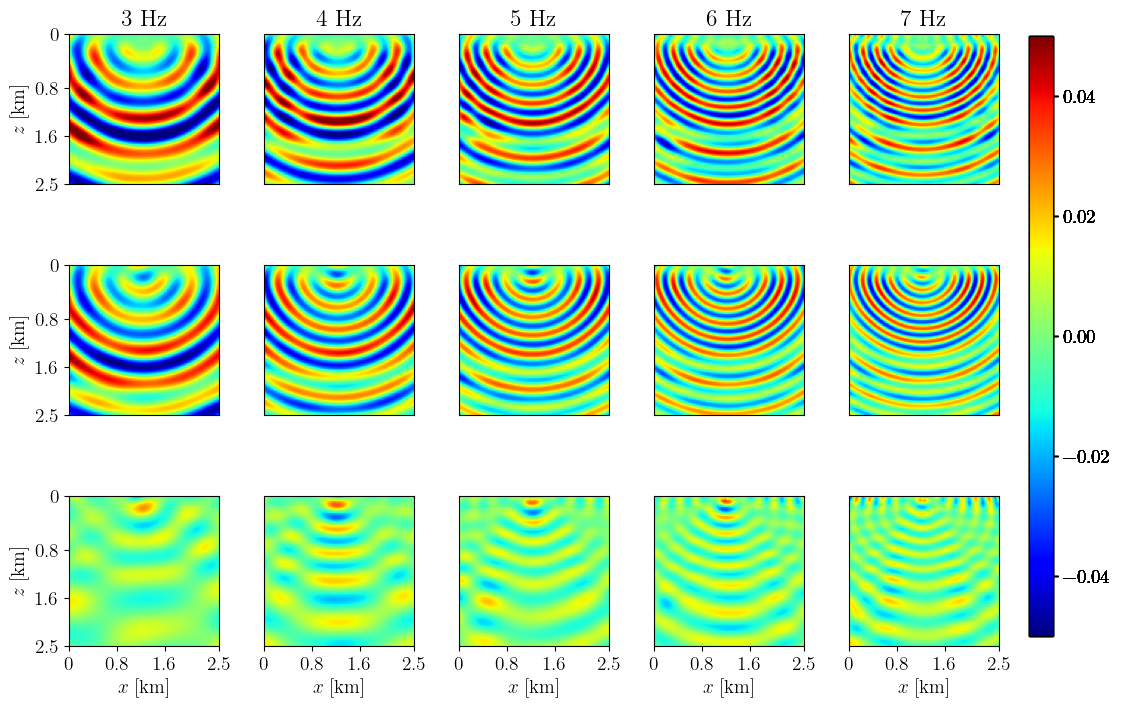

In [13]:
from matplotlib.gridspec import GridSpec

images = np.vstack((dUr_test,dUr_pred,dUr_test-dUr_pred))


# create a figure with 2 rows and 5 columns
fig = plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
gs = GridSpec(3, 5, figure=fig)
plt.rcParams.update({'font.size': 14})

# create subplots and plot the data
counter = 0
for i in range(15):
    ax = fig.add_subplot(gs[i])
    data = images[counter*N_Test:(counter+1)*N_Test].reshape((Nz,Nx),order='F')
    im = ax.imshow(data,extent=[0,2.5,0,2.5],cmap='jet')
    if i in range(10):
        plt.tick_params(axis='x', which='both',  length=0, labelcolor='none')
    if i not in (0,5,10):
        plt.tick_params(axis='y', which='both',  length=0, labelcolor='none')
    if i in range(5):
        ax.set_title(str(freq_list[i])+' Hz')
    if i in (0,5,10):
        ax.set_yticks([0, 0.8, 1.6, 2.5])
        ax.set_yticklabels(np.flip(['0','0.8','1.6','2.5']))
        ax.set_ylabel(r'$z\; [\textrm{km}]$')
    if i > 9:
        ax.set_xticks([0, 0.8, 1.6, 2.5])
        ax.set_xticklabels((['0','0.8','1.6','2.5']))
        ax.set_xlabel(r'$x\; [\textrm{km}]$')
        
    
        
    
    # create a colorbar
    cax     = fig.add_axes([0.925, 0.125, 0.02, 0.75]) # [left, bottom, width, height]
    cb = fig.colorbar(im, cax=cax, orientation='vertical')
    im.set_clim(-0.05, 0.05)    
        
    counter = counter + 1
    

# cb.set_label('Amplitude')

# save the figure
# fig.savefig('../Outputs/predictions_'+filename+'.pdf', bbox_inches='tight')

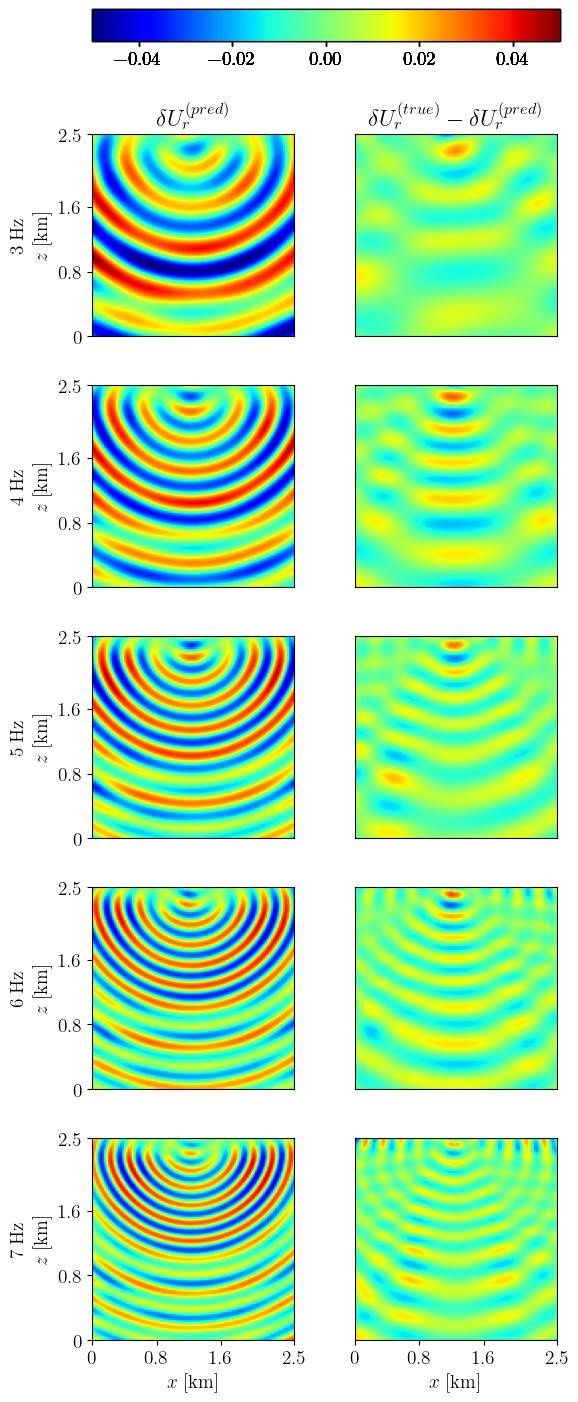

In [14]:
from matplotlib.gridspec import GridSpec

difference_image = dUr_test-dUr_pred
images = np.vstack((dUr_test,dUr_pred,difference_image))


# create a figure with 2 rows and 5 columns
fig = plt.figure(figsize=(6, 16))
plt.subplots_adjust(wspace=0.3, hspace=0.1)
gs = GridSpec(5, 2, figure=fig)
plt.rcParams.update({'font.size': 14})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

f_list = np.r_[3,0,4,0,5,0,6,0,7]

counter_1 = 0
counter_2 = 0
for i in range(10): 
    
    if i%2==0:
        ax = fig.add_subplot(gs[i])
        data = dUr_pred[counter_1*N_Test:(counter_1+1)*N_Test].reshape((Nz,Nx),order='F')
        im = ax.imshow(data, extent=[0,2.5,0,2.5],cmap='jet')
        counter_1 = counter_1 + 1 
        ax.set_yticks([0, 0.8, 1.6, 2.5])
        ax.set_yticklabels(['0','0.8','1.6','2.5'])

#         ax.set_ylabel(f'$\\begin{{array}}{{c}} {f_list[i]} \\\\ z \; \\textrm{{[km]}} \\end{{array}}$', fontsize=14)
        ax.set_ylabel(f'$\\begin{{array}}{{c}} {f_list[i]} \\; \\textrm{{Hz}} \\\\ z \\; \\textrm{{[km]}} \\end{{array}}$', fontsize=14)


        
        
        if i!=8:
            plt.tick_params(axis='x', which='major',  length=0, labelcolor='none')
        if i==8:
            ax.set_xticks([0, 0.8, 1.6, 2.5])
            ax.set_xticklabels(['0','0.8','1.6','2.5'])
            ax.set_xlabel(r'$x\; [\textrm{km}]$')
         
        cax     = fig.add_axes([0.125, 0.93, 0.78, 0.02]) # [left, bottom, width, height]
        cb = fig.colorbar(im, cax=cax, orientation='horizontal')
        im.set_clim(-0.05, 0.05)
        if i == 0:
            ax.set_title(r'$\delta U_r^{(pred)}$')
            
                
        
    else:
        ax = fig.add_subplot(gs[i])
        data = difference_image[counter_2*N_Test:(counter_2+1)*N_Test].reshape((Nz,Nx),order='F')
        im = ax.imshow(data, extent=[0,2.5,0,2.5], cmap='jet')
        counter_2 = counter_2 + 1    
        plt.tick_params(axis='y', which='both',  length=0, labelcolor='none')
        if i!=9:
            plt.tick_params(axis='x', which='major',  length=0, labelcolor='none')
        if i==9:
            ax.set_xticks([0, 0.8, 1.6, 2.5])
            ax.set_xticklabels(['0','0.8','1.6','2.5'])
            ax.set_xlabel(r'$x\; [\textrm{km}]$')
        cax     = fig.add_axes([0.125, 0.93, 0.78, 0.02]) # [left, bottom, width, height]
        cb = fig.colorbar(im, cax=cax, orientation='horizontal')
        im.set_clim(-0.05, 0.05)
        if i == 1:
            ax.set_title(r'$\delta U_r^{(true)} - \delta U_r^{(pred)}$')

        


In [15]:
savemat('extrapolation.mat', {'dUr_test': dUr_test,'dUr_pred': dUr_pred,'dUr_diff': dUr_test - dUr_pred })